In [1]:
from matplotlib import pyplot as plt
import random
from copy import deepcopy
import networkx as nx

In [12]:
def maxNumOfColours(graph):
    maxDegree = 0
    for i in graph:
        degree = len(list(graph.neighbors(i)))
        # print(i,degree)
        if degree > maxDegree:
            maxDegree = degree
            
    return maxDegree + 1

In [3]:
def normEdge(u, v):
    return (u, v) if u < v else (v, u)

In [29]:
def calcConflicts(graph, solution, neighbourhood):
    edgeColour = {normEdge(u, v): solution[i] for i, (u, v) in enumerate(graph.edges())}
    # print(edgeColour)

    # neighbourhood = getNeighbours(graph)
    num  = 0

    for edge in edgeColour:
        myNeighbours = neighbourhood[edge]

        for nei in myNeighbours:
            if edgeColour[edge] == edgeColour[nei]:
                num += 1        
        
    return (num // 2)


In [36]:
def getNeighbours(graph):

    neighbourhood = {normEdge(u, v): [] for _, (u, v) in enumerate(graph.edges())} 


    for edge in graph.edges():
        u, v = edge
        uNei = list(graph.neighbors(u))
        vNei = list(graph.neighbors(v))
        uNei.remove(v)
        vNei.remove(u)
        mapa = {}

        for i in    uNei:
            nei = normEdge(u, i)
            neighbourhood[edge].append(nei)
            mapa[nei] = True

        for i in vNei:
            nei = normEdge(v, i)
            if nei not in mapa:
              neighbourhood[edge].append(nei)
    # print(neighbourhood)

    return neighbourhood

In [6]:
def shaking(solution, k, maxDegree):
    newSolution = deepcopy(solution)
    chosen = random.sample(range(len(solution)),k)
    # print(solution , " " , chosen)
    
    for i in chosen:
        newSolution[i] = random.randrange(1, maxDegree+1)
    return newSolution

In [7]:
def lsFirst(graph, solution, fitness, maxDegree, neighbourhood):
    newSolution = deepcopy(solution)
    improved = True

    while improved:
        improved = False
        indices = list(range(len(solution)))
        random.shuffle(indices)

        for i in indices:
            oldColour = newSolution[i]
            for colour in range(1,maxDegree+1):
                if colour == oldColour:
                    continue
                newSolution[i] = colour
                # newSolution[i] = random.randrange(1, maxDegree+1)
                newFitness = calcConflicts(graph, newSolution, neighbourhood)
                if newFitness < fitness:
                    fitness = newFitness
                    improved = True
                    break
                else:
                    newSolution[i] = oldColour
    return newSolution, fitness


In [9]:
def initialize(graph, max_degree):
    return [random.randrange(1,max_degree + 1) for _ in range(len(graph.edges))]

In [8]:
def vns(graph, maxDegree, maxIters, neighRange, probVal):
    solution = initialize(graph,maxDegree)
    neighbourhood = getNeighbours(graph)

    fitness = calcConflicts(graph, solution, neighbourhood)

    for it in range(maxIters):
        for k in range(1,neighRange+1):
        #while k <= neighRange
            
            newSolution = shaking(solution, k, maxDegree)
            newFitness = calcConflicts(graph, newSolution, neighbourhood)
            newSolution, newFitness = lsFirst(graph, newSolution, newFitness, maxDegree, neighbourhood)

            if newFitness < fitness or (newFitness == fitness and random.random() < probVal):
                fitness = newFitness
                solution = deepcopy(newSolution)
                # k = 1
            #else: k += 1
    return solution, fitness



In [11]:
def draw(graph, colouring):
    nx.draw(graph, edge_color=colouring,with_labels=True)
    plt.show()

In [38]:
def solve(graph, iters, neighRange, prob, minus):
    maxDegree = maxNumOfColours(graph) - minus
    solution, fitness = vns(graph, maxDegree, iters, neighRange, prob)
    print(solution," ",fitness)
    draw(graph, solution)

In [15]:
graph = nx.Graph()
graph.add_nodes_from(range(1,6))
graph.add_edges_from([
    (1,2),(2,3),(3,5),(4,5),(5,2)
])

[2, 1, 4, 2, 1]   0


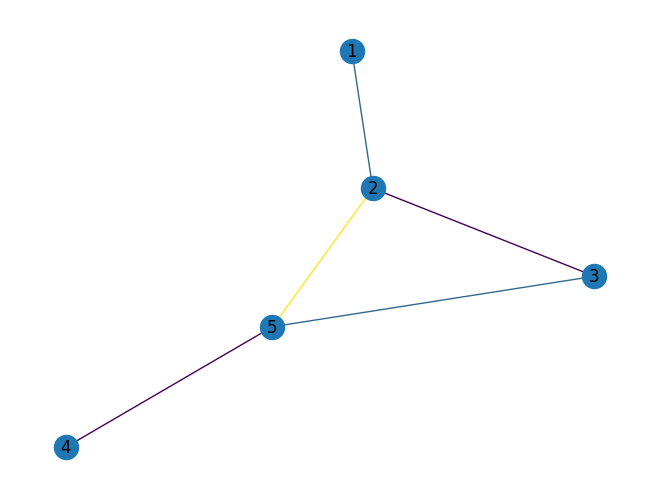

In [44]:
solve(graph, 100, 3, 0.5, 0)

[1, 3, 2, 2, 3, 1, 1, 3, 2]   0


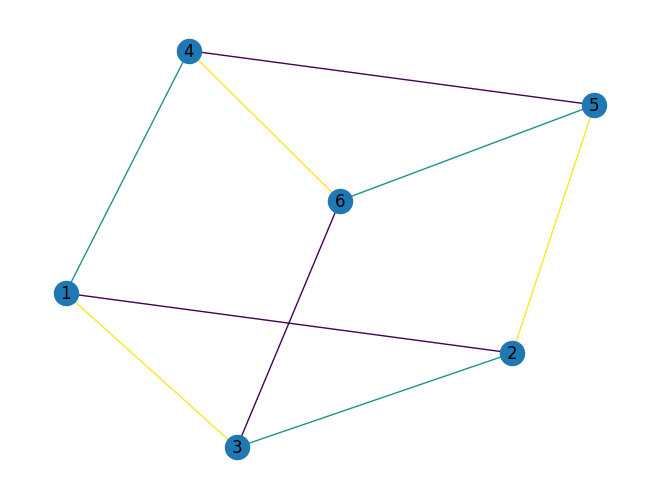

In [40]:
graphTest = nx.Graph()
graphTest.add_nodes_from(range(1,7))
graphTest.add_edges_from([
    (1,2), (1,3), (1,4),(2,3), (2,5),(3,6),(4,5),(5,6),(4,6)
])
solve(graphTest, 100, 3, 0.3, 1)